In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler

In [2]:
boston = load_boston()

In [3]:
features = pd.DataFrame(boston.data, columns= boston.feature_names)
target = pd.Series(boston.target)

In [4]:
features.shape

(506, 13)

In [5]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
model = Sequential([
    Dense(150,activation='relu',input_shape=(None,13)),
    Dense(50,activation='relu'),
    Dense(1,activation='relu')
])
model.compile(loss='mse',optimizer='adam')

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 150)         2100      
_________________________________________________________________
dense_1 (Dense)              (None, None, 50)          7550      
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           51        
Total params: 9,701
Trainable params: 9,701
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(scaled_features,target,epochs=5,validation_split=0.2)

Epoch 1/5
13/13 [==============================] - 0s 13ms/step - loss: 625.1038 - val_loss: 236.0623
Epoch 2/5
13/13 [==============================] - 0s 4ms/step - loss: 524.2981 - val_loss: 189.6322
Epoch 3/5
13/13 [==============================] - 0s 3ms/step - loss: 380.3466 - val_loss: 141.9890
Epoch 4/5
13/13 [==============================] - 0s 4ms/step - loss: 211.0263 - val_loss: 97.6388
Epoch 5/5
13/13 [==============================] - 0s 4ms/step - loss: 93.9220 - val_loss: 63.5458


In [10]:
loss_df = pd.DataFrame(model.history.history)

In [11]:
loss_df

,loss,val_loss
0,625.103821,236.062256
1,524.298096,189.632233
2,380.346619,141.988968
3,211.026306,97.638817
4,93.922020,63.545753


<AxesSubplot:>

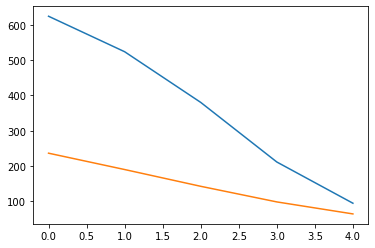

In [12]:
loss_df['loss'].plot()
loss_df['val_loss'].plot()